In [2]:
import numpy as np
import matplotlib.pyplot as plt

a) Iterative Policy Evaluation and Improvement for the Gambler's Problem

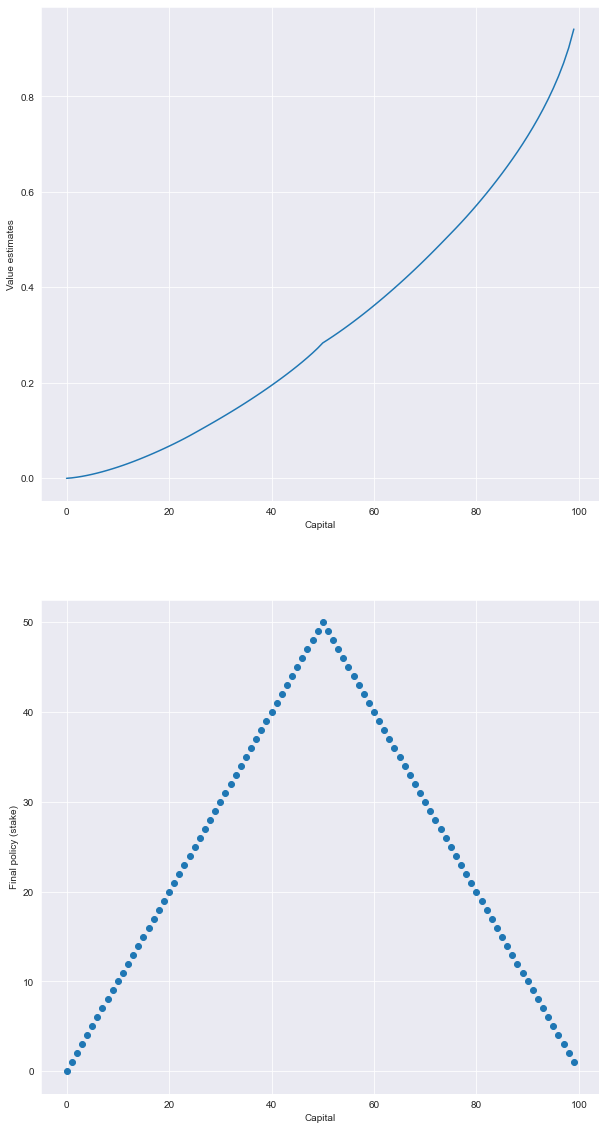

In [3]:
# Parameters from the book
p_h = 0.4
goal = 100

# Initial policy and state-value
policy = np.zeros(goal)
value = np.zeros(goal + 1)

def policy_evaluation(policy, value):
    while True:
        delta = 0
        for s in range(1, goal):
            v = value[s]
            value[s] = sum([p_h * (int(s + a >= goal) + value[s + a]) + (1 - p_h) * value[s - a] for a in range(min(s, goal - s) + 1)]) / (min(s, goal - s) + 1)
            delta = max(delta, abs(v - value[s]))
        if delta < 1e-20:
            break
    return value

def policy_improvement(policy, value):
    for s in range(1, goal):
        actions = np.zeros(min(s, goal - s) + 1)
        for a in range(1, min(s, goal - s) + 1):
            actions[a] = p_h * (int(s + a >= goal) + value[s + a]) + (1 - p_h) * value[s - a]
        policy[s] = np.argmax(actions)
    return policy

value = policy_evaluation(policy, value)
policy = policy_improvement(policy, value)

plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1)
plt.plot(value[:-1])
plt.xlabel('Capital')
plt.ylabel('Value estimates')

plt.subplot(2, 1, 2)
plt.scatter(range(goal), policy)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.show()

b) Value Iteration for the Gambler's Problem

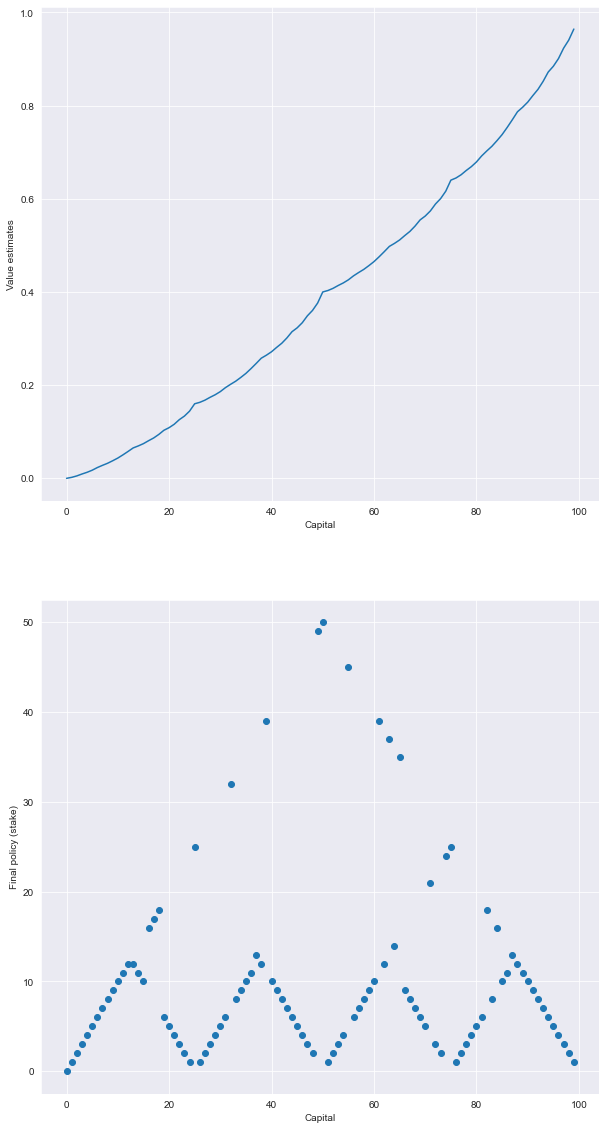

In [4]:
value = np.zeros(goal + 1)

def value_iteration(value):
    while True:
        delta = 0
        for s in range(1, goal):
            v = value[s]
            actions = np.zeros(min(s, goal - s) + 1)
            for a in range(1, min(s, goal - s) + 1):
                actions[a] = p_h * (int(s + a >= goal) + value[s + a]) + (1 - p_h) * value[s - a]
            value[s] = max(actions)
            delta = max(delta, abs(v - value[s]))
        if delta < 1e-20:
            break
    return value

value = value_iteration(value)
policy = policy_improvement(policy, value)

plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1)
plt.plot(value[:-1])
plt.xlabel('Capital')
plt.ylabel('Value estimates')

plt.subplot(2, 1, 2)
plt.scatter(range(goal), policy)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.show()